In [1]:
import datetime
import time

import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pgpasslib

from querymsc import WorkflowTools
%load_ext autoreload
%autoreload 2

In [2]:
connection_string = "postgresql+psycopg2://nannau@dbmsc.pcic.uvic.ca/msc"
engine = create_engine(connection_string)
Session = sessionmaker(bind=engine)
session = Session()

In [348]:
start_time = datetime.datetime(1950, 1, 1)
end_time = datetime.datetime(2018, 1, 1)

msc = WorkflowTools(start_time, end_time)

68.0


In [7]:
annual_tot_precip = msc.query_annual_precip(session)
annual_tot_rain = msc.query_annual_rain(session)
query_temp = msc.query_design_temp_percentile(session)

In [ ]:
query = msc.query_design_temp_percentile(session)

In [ ]:
annual_tot_precip = msc.query_annual_precip(session)
pd.read_sql(annual_tot_precip.statement, engine)

In [ ]:
annual_tot_rain = msc.query_annual_rain(session)
pd.read_sql(annual_tot_rain.statement, engine)

In [ ]:
query_temp = msc.query_design_temp_percentile(session)
pd.read_sql(query_temp.statement, engine)

In [ ]:
query_design_temp_dry = msc.query_design_temp_dry(session)
pd.read_sql(query_design_temp_dry.statement, engine).head()

In [ ]:
query_design_temp_wet = msc.query_design_temp_wet(session)
pd.read_sql(query_design_temp_wet.statement, engine)

In [ ]:
hdd = msc.query_deg_day_below_18(session)
pd.read_sql(hdd.statement, engine)

In [88]:
df_vars = pd.read_sql(msc.query_variables(session).statement, engine)
#df_vars[df_vars['net_var_name']=='127']
#df_vars[(df_vars['net_var_name'].astype(int) > 124) & (df_vars['net_var_name'].astype(int) < 132)]
df_vars[df_vars['standard_name'].str.contains('rain')]

,vars_id,standard_name,long_description,unit,cell_method,net_var_name
91,1380,thickness_of_rainfall_amount,Hourly rainfall,0.1 mm,time: sum,123
93,1382,rainfall_rate,5 minutes,0.1mm,,125
94,1383,rainfall_rate,10 minutes,0.1mm,,126
95,1384,rainfall_rate,15 minutes,0.1mm,,127
96,1385,rainfall_rate,30 minutes,0.1mm,,128
97,1386,rainfall_rate,1 hour,0.1mm,,129
98,1387,rainfall_rate,2 hours,0.1mm,,130
99,1388,rainfall_rate,6 hours,0.1mm,,131
100,1389,rainfall_rate,12 hours,0.1mm,,132
102,1391,rainfall_rate,24 hours,0.1mm,,161


In [350]:
rain_rate = msc.query_rain_rate_15(session)
df_rain_rate = pd.read_sql(rain_rate.statement, engine)

In [352]:
df_rain = df_rain_rate[(df_rain_rate['completeness'] > 0.85) & (df_rain_rate['rainfall_rate'] > 0) ]
df_rain

,rainfall_rate,time_min,time_max,lat,lon,station_id,completeness
0,18.3,1950-01-03,1950-12-31,43.6667,-79.4000,6538,0.922656
2,15.5,1951-01-01,1951-12-31,43.6667,-79.4000,6538,0.900753
4,23.1,1952-01-01,1952-12-31,43.6667,-79.4000,6538,0.933607
6,13.5,1953-01-01,1953-12-31,43.6667,-79.4000,6538,0.911704
8,10.2,1954-01-01,1954-12-31,43.6667,-79.4000,6538,0.903491
10,18.0,1955-01-01,1955-11-30,43.6667,-79.4000,6538,0.854209
55,10.2,1960-01-01,1960-12-31,44.6500,-63.5667,8132,0.908966
59,9.4,1960-01-06,1960-12-31,45.3181,-65.8856,7984,0.898015
68,14.7,1960-01-01,1960-12-31,45.5000,-73.5833,6981,0.950034
69,14.7,1960-01-01,1960-12-31,45.9167,-66.6167,12243,0.892539


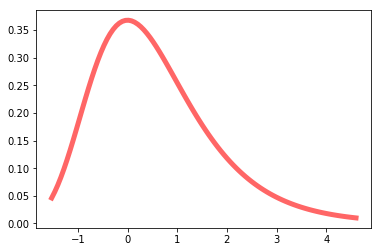

In [353]:
from scipy.stats import gumbel_r
import numpy as np
ax = plt.axes()
x = np.linspace(gumbel_r.ppf(0.01),
                gumbel_r.ppf(0.99), 100)
ax.plot(x, gumbel_r.pdf(x),
        'r-', lw=5, alpha=0.6, label='gumbel_r pdf')


In [429]:
iv = 0.1
df_gb = df_rain.groupby('station_id')#['rainfall_rate']#.pipe(lambda x: np.argwhere(np.diff(np.sign(x - iv))).flatten()[1])

from scipy import interpolate
import lmoments3 as lm
from lmoments3 import distr

#paras = distr.gam.lmom_fit(x)

def fit_gumbel(x):
    #x = x['rainfall_rate'].values
    N = x.shape[0]
    euler = 0.5772156649
    if N >= 10:
        paras = distr.gum.lmom_fit(x)
        #fitted_gum = distr.gum(**paras)
        #exval = fitted_gum.ppf(0.1)
        lmoments = distr.gum.lmom(nmom=2, **paras)
        #lmoments = lm.lmom(x, nmom=2)
        alpha = lmoments[1]/np.log(2)
        xi = lmoments[0] - euler*alpha 
        ok = get_gumbel_design_value(xi, alpha)
        return ok
    
def get_gumbel_design_value(xi, alpha):
    gamma = 0.1 + np.exp(-np.exp(xi/alpha))
    est = xi - alpha*np.log(-np.log(gamma))
    return est

dv = []

df_rain.join(df_rain.groupby('station_id')['rainfall_rate'].apply(fit_gumbel), on='station_id', rsuffix='_new')

#for name, group in df_gb:
#    #if group.values.shape[0] >= 10:
#    # print the data of that regiment
#   #print('group', group.values)
#    #print(group['rainfall_rate'])
#    df_grouped.groupby(level=[0, 1, 2]).apply(fancy_func)
#    df_gb.['new'] = fit_gumbel(group['rainfall_rate'].values)
#
#print(dv[np.where(dv >= 0)])

,rainfall_rate,time_min,time_max,lat,lon,station_id,completeness,rainfall_rate_new
0,18.3,1950-01-03,1950-12-31,43.6667,-79.4000,6538,0.922656,8.373488
2,15.5,1951-01-01,1951-12-31,43.6667,-79.4000,6538,0.900753,8.373488
4,23.1,1952-01-01,1952-12-31,43.6667,-79.4000,6538,0.933607,8.373488
6,13.5,1953-01-01,1953-12-31,43.6667,-79.4000,6538,0.911704,8.373488
8,10.2,1954-01-01,1954-12-31,43.6667,-79.4000,6538,0.903491,8.373488
10,18.0,1955-01-01,1955-11-30,43.6667,-79.4000,6538,0.854209,8.373488
55,10.2,1960-01-01,1960-12-31,44.6500,-63.5667,8132,0.908966,7.788989
59,9.4,1960-01-06,1960-12-31,45.3181,-65.8856,7984,0.898015,7.968716
68,14.7,1960-01-01,1960-12-31,45.5000,-73.5833,6981,0.950034,15.707517
69,14.7,1960-01-01,1960-12-31,45.9167,-66.6167,12243,0.892539,NaN


In [426]:
group['new']

4876     None
7703     None
9580     None
10197    None
10791    None
11372    None
11940    None
Name: new, dtype: object

In [406]:
df_rain['15_min_rain_extreme']

KeyError: '15_min_rain_extreme'

In [365]:
#df_rain_rate['obs_count'].value_counts().idxmax()

In [366]:
df_dv = pd.DataFrame(dv, columns=['dv'])

In [367]:
df_dv

,dv
0,4.230989
1,6.475732
2,3.763945
3,5.438313
4,4.721381
5,4.270647
6,4.175265
7,7.563507
8,7.414885
9,6.583697


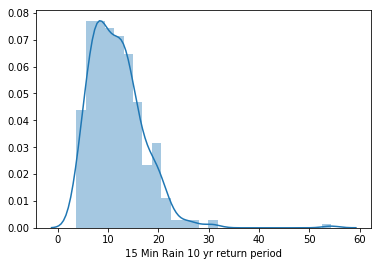

In [373]:
sns.distplot(df_dv[df_dv['dv'] < 60]['dv'])#.hist(bins = 100)
plt.xlabel('15 Min Rain 10 yr return period')
plt.savefig('./plots/15_min_rain.pdf')

In [437]:
a = np.arange(10)
b = np.linspace(0, 100, a.shape[0])
print('a', a)
print('b', b)
print('where', np.where(a<8, b, np.nan))

a [0 1 2 3 4 5 6 7 8 9]
b [  0.          11.11111111  22.22222222  33.33333333  44.44444444
  55.55555556  66.66666667  77.77777778  88.88888889 100.        ]
where [ 0.         11.11111111 22.22222222 33.33333333 44.44444444 55.55555556
 66.66666667 77.77777778         nan         nan]
